In [1]:
%matplotlib inline
import sys
import csv
import time
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO, Seq, motifs
from Bio.Alphabet import IUPAC
import matplotlib.gridspec as gridspec


from IPython.display import Image
pl.rcParams['figure.figsize'] = (14, 10)
pl.rcParams['ytick.labelsize'] = 20
pl.rcParams['xtick.labelsize'] = 20
pl.rcParams['axes.labelsize'] = 23
pl.rcParams['legend.fontsize'] = 20
sns.set_style('ticks')
c1, c2, c3, c4 = sns.color_palette("Set1", 4)
from IPython.core.display import HTML
css_file = '/import/bc2/home/zavolan/gumiennr/.ipython/profile_default/static/custom/custom.css'
HTML(open(css_file, "r").read())


from MetaProfile import utils as metafun
from MetaProfile import Signal, Window, Profile, MetaProfiler, get_profiler, get_signals
import metaseq
import utils
from CLIP import ShortRead

In [26]:
reload(metafun)
reload(Signal)
reload(Window)
reload(Profile)
reload(PC)

<module 'MetaPy.ProfileCreator' from '/import/bc2/home/zavolan/gumiennr/PythonModules/MetaPy/ProfileCreator.pyc'>

In [4]:
signal60 = Signal("CPSF-160-60min",
                       "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_60/mapped_sequences.all.bed")
signal120 = Signal("CPSF-160-120min",
                       "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_120/mapped_sequences.all.bed")
signal30 = Signal("CPSF-160-30min",
                       "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_30/mapped_sequences.all.bed")
signal240 = Signal("CPSF-160-240min",
                       "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_240/mapped_sequences.all.bed")

Creating CPSF-160-60min signal. It may take few minutes...
Creating CPSF-160-120min signal. It may take few minutes...
Creating CPSF-160-30min signal. It may take few minutes...
Creating CPSF-160-240min signal. It may take few minutes...


In [2]:
signal_list = ({'name': "CPSF-160-60min",
                'filepath': "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_60/mapped_sequences.all.bed"},
               {'name': "CPSF-160-120min",
                'filepath': "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_120/mapped_sequences.all.bed"},
               {'name': "CPSF-160-30min",
                'filepath': "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_30/mapped_sequences.all.bed"},
               {'name': "CPSF-160-240min",
                'filepath': "/import/bc2/home/zavolan/gumiennr/Ule/Ule/CLIPzSamples/AnalysisForPaper/time_240/mapped_sequences.all.bed"})

In [3]:
windows_list = ({'name': "PolyA-signal",
                 'filepath': "/import/bc2/home/zavolan/gumiennr/Ule/Ule/AdditionalData/PolyAsignal/PolyAsignal_from_asymetric.bed",
                 'pseudocount': 0})

In [ ]:
pc = get_profiler(signal_list, windows_list)

In [5]:
windows = Window("PolyA-signal",
                        "/import/bc2/home/zavolan/gumiennr/Ule/Ule/AdditionalData/PolyAsignal/PolyAsignal_from_asymetric.bed",
                       pseudocount=0)

In [7]:
pc = PC([signal30, signal60, signal120, signal240], [windows])

In [8]:
pc.create_profiles(normalize_to_library=True)

Calculating profile for CPSF-160-30min on PolyA-signal
 - normalizing to gene
 - normalizing to library
Calculating profile for CPSF-160-60min on PolyA-signal
 - normalizing to gene
 - normalizing to library
Calculating profile for CPSF-160-120min on PolyA-signal
 - normalizing to gene
 - normalizing to library
Calculating profile for CPSF-160-240min on PolyA-signal
 - normalizing to gene
 - normalizing to library


In [9]:
pc.show_profiles()

1. 'CPSF-160-60min on PolyA-signal'
2. 'CPSF-160-120min on PolyA-signal'
3. 'CPSF-160-30min on PolyA-signal'
4. 'CPSF-160-240min on PolyA-signal'


CPSF-160-60min on PolyA-signal 219.897301226
CPSF-160-120min on PolyA-signal 16.7178674066
CPSF-160-30min on PolyA-signal 112.31361279
CPSF-160-240min on PolyA-signal 31.0265252866


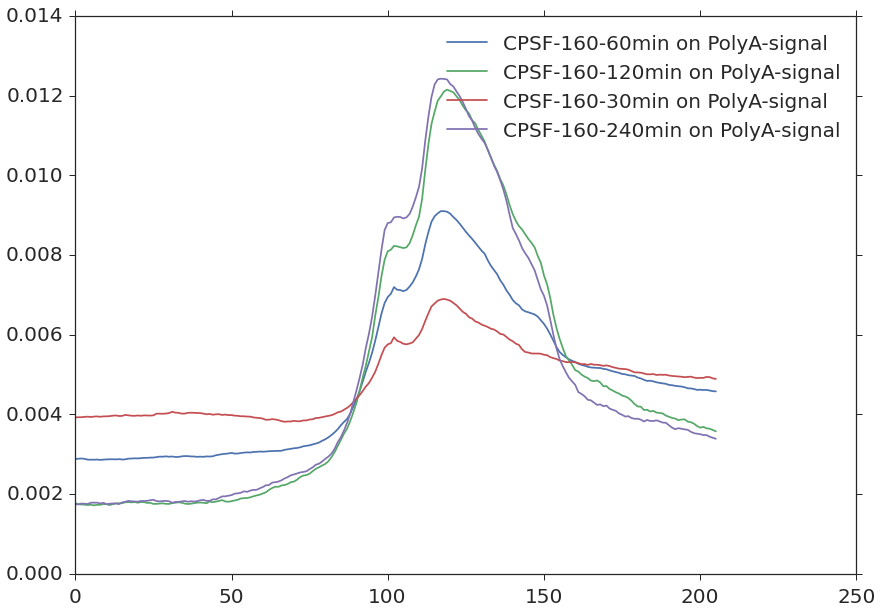

In [10]:
fig, ax = pl.subplots()
for profile_name, profile in pc.profiles.iteritems():
    print profile_name, profile.get_aggregated_profile("raw", metric='mean').sum()
    #profile.plot_line("normalized_to_library", ax=ax, aggregate=True, label=profile_name, metric='sum')
    ax.plot(profile.get_aggregated_profile("raw", metric='mean')/profile.get_aggregated_profile("raw", metric='mean').sum(),
           label=profile_name)
pl.legend()

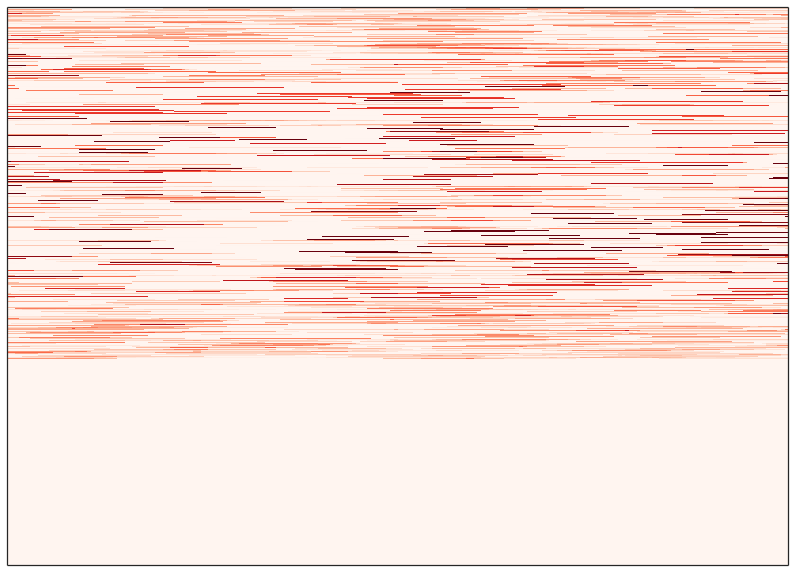

In [11]:
pc.profiles['CPSF-160-30min on PolyA-signal'].plot_heatmap("normalized_to_gene",
        sort_by=pc.profiles['CPSF-160-30min on PolyA-signal'].profile_normalized_to_gene.mean(axis=1),
                                                          cmap='Reds')

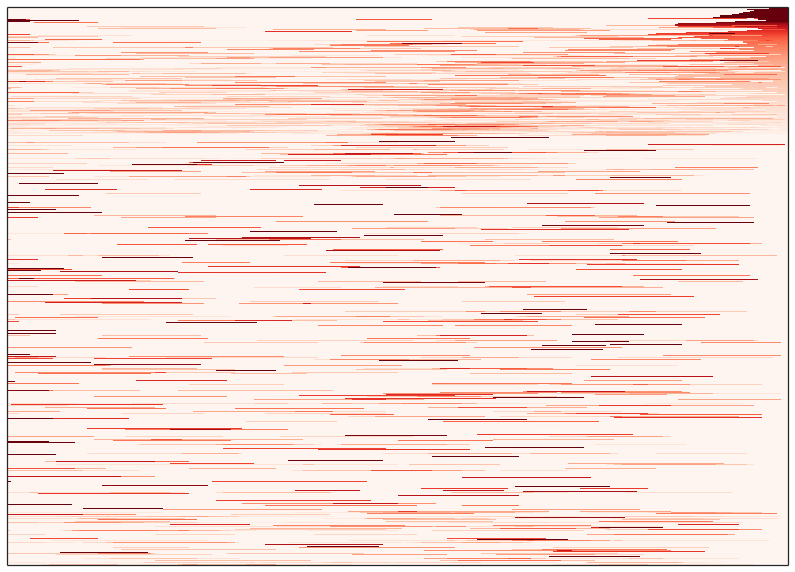

In [86]:
pc.profiles['CPSF-160-30min on PolyA-signal'].plot_heatmap("normalized_to_gene",
        sort_by=pc.profiles['CPSF-160-30min on PolyA-signal'].profile_normalized_to_gene[:, -1],
                                                          cmap='Reds')

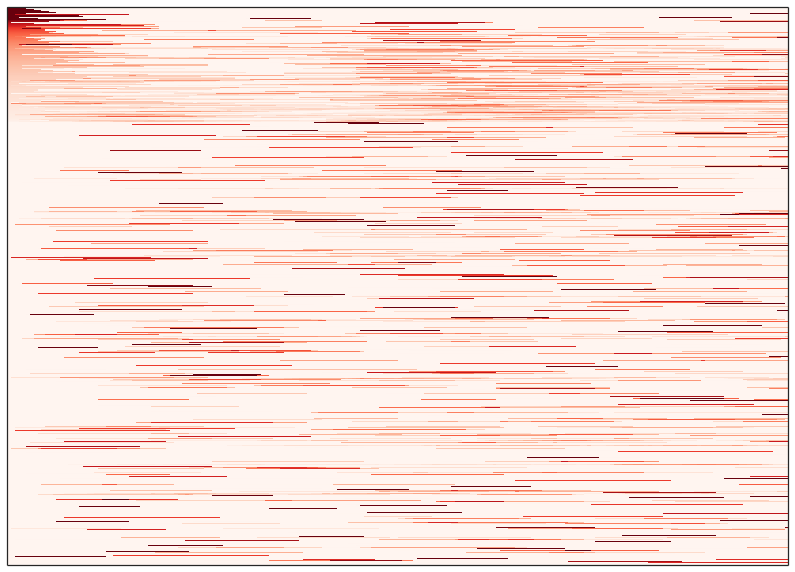

In [88]:
pc.profiles['CPSF-160-30min on PolyA-signal'].plot_heatmap("normalized_to_gene",
                    sort_by=pc.profiles['CPSF-160-30min on PolyA-signal'].profile_normalized_to_gene[:, 0],
                                                          cmap='Reds')

In [38]:
reload(Profile)
reload(PC)

<module 'MetaPy.ProfileCreator' from '/import/bc2/home/zavolan/gumiennr/PythonModules/MetaPy/ProfileCreator.pyc'>